In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import scipy.stats as stats

In [3]:
df = pd.read_csv('Solicitud_Historica/Historico_pm25.csv', sep=';')

In [4]:
# Rename the first column to 'Fecha_Hora'
df.rename(columns={df.columns[0]: 'Fecha_Hora'}, inplace=True)

In [5]:
# Convert 'Fecha_Hora' to datetime
df['Fecha_Hora'] = pd.to_datetime(df['Fecha_Hora'], format='%d/%m/%y %H:%M')

In [6]:
# Filter out data before 2019-01-01 and after 2024-12-31
df = df[(df['Fecha_Hora'] >= '2019-01-01') & (df['Fecha_Hora'] <= '2024-12-31')].reset_index(drop=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52585 entries, 0 to 52584
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha_Hora  52585 non-null  datetime64[ns]
 1   BAR-TORR    49229 non-null  float64       
 2   GIR-SOSN    16804 non-null  float64       
 3   GIR-EPM     33981 non-null  float64       
 4   COP-CVID    50943 non-null  float64       
 5   BEL-FEVE    50158 non-null  float64       
 6   MED-ARAN    50632 non-null  float64       
 7   MED-PBLQ    22647 non-null  float64       
 8   MED-SCRI    50281 non-null  float64       
 9   MED-FISC    40043 non-null  float64       
 10  MED-UNNV    9810 non-null   float64       
 11  MED-VILL    50017 non-null  float64       
 12  CEN-TRAF    49873 non-null  float64       
 13  MED-BEME    50894 non-null  float64       
 14  MED-SELE    47913 non-null  float64       
 15  MED-PROV    10099 non-null  float64       
 16  MED-ALTA    49993 non-

In [11]:
# Drop all the columns with more than 7% missing values
threshold = len(df) * 0.93
df = df.dropna(thresh=threshold, axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52585 entries, 0 to 52584
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha_Hora  52585 non-null  datetime64[ns]
 1   BAR-TORR    49229 non-null  float64       
 2   COP-CVID    50943 non-null  float64       
 3   BEL-FEVE    50158 non-null  float64       
 4   MED-ARAN    50632 non-null  float64       
 5   MED-SCRI    50281 non-null  float64       
 6   MED-VILL    50017 non-null  float64       
 7   CEN-TRAF    49873 non-null  float64       
 8   MED-BEME    50894 non-null  float64       
 9   MED-ALTA    49993 non-null  float64       
 10  MED-TESO    50321 non-null  float64       
 11  ITA-CJUS    51123 non-null  float64       
 12  ITA-CONC    49995 non-null  float64       
 13  ENV-HOSP    50760 non-null  float64       
 14  EST-HOSP    51322 non-null  float64       
 15  SAB-RAME    50166 non-null  float64       
 16  CAL-JOAR    50412 non-

In [13]:
df.head()

Fecha_Hora  BAR-TORR  COP-CVID  BEL-FEVE  MED-ARAN  MED-SCRI  \
0 2019-01-01 00:00:00   93.6646       NaN  188.8740  198.4560  108.4140   
1 2019-01-01 01:00:00   50.3542       NaN  110.1980  134.0200   70.1561   
2 2019-01-01 02:00:00   35.0655       NaN   94.8215   83.9968   44.2872   
3 2019-01-01 03:00:00   29.1859       NaN   73.6579   59.0683   41.7584   
4 2019-01-01 04:00:00   27.9737       NaN   44.3655   43.6580   25.7170   

   MED-VILL  CEN-TRAF  MED-BEME  MED-ALTA  MED-TESO  ITA-CJUS  ITA-CONC  \
0   57.8790     115.0   67.1179   77.0134   26.6834     171.0      79.0   
1   49.1590      79.0   58.6878   36.6871   23.0106     198.0      74.0   
2   59.9013      59.0   50.2286   39.0220   20.5705     160.0      56.0   
3   74.1180      58.0   53.7066   36.6138   20.5436     155.0      37.0   
4   58.4576      63.0   39.3297   27.0872   19.2904     115.0      43.0   

   ENV-HOSP  EST-HOSP  SAB-RAME  CAL-JOAR  
0   44.5809      28.0   62.7140       NaN  
1   44.5023      19.0   44.5194       NaN  
2   44.4149      27.0   45.7275       NaN  
3   41.9547      31.0   58.8523   31.6231  
4   35.9086      22.0   85.0434   29.0643

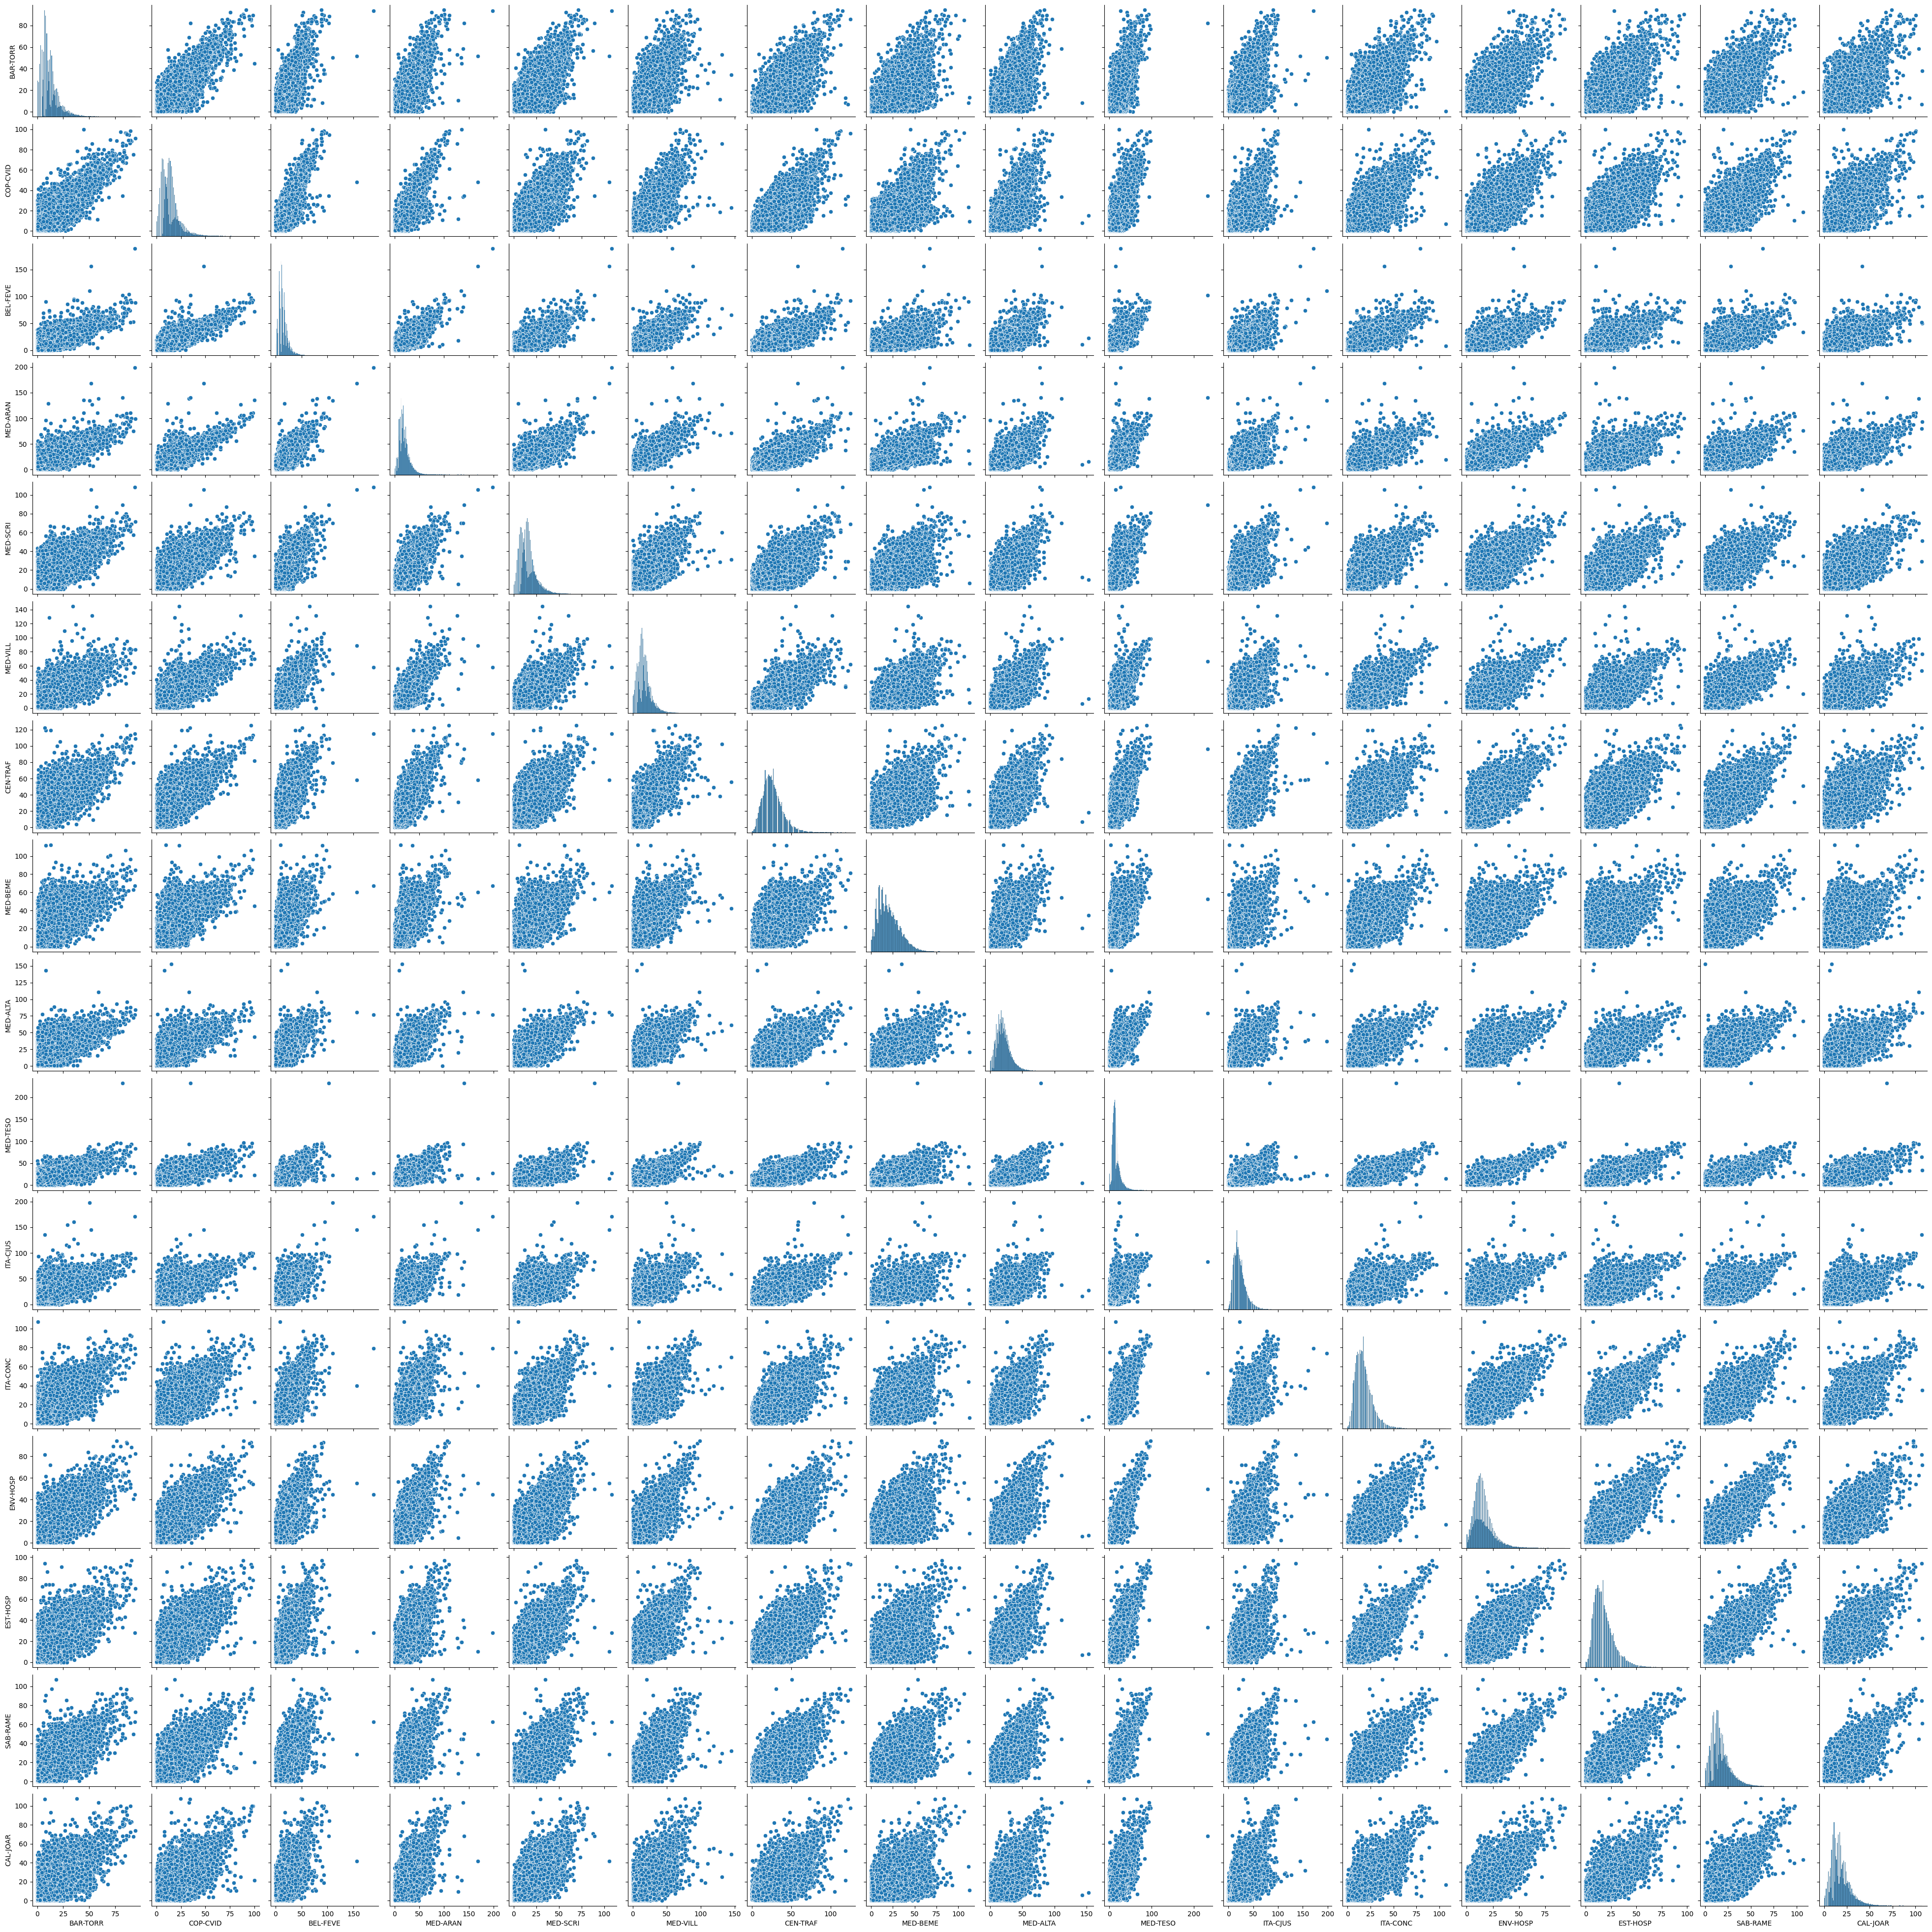

In [14]:
# Pairplot
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

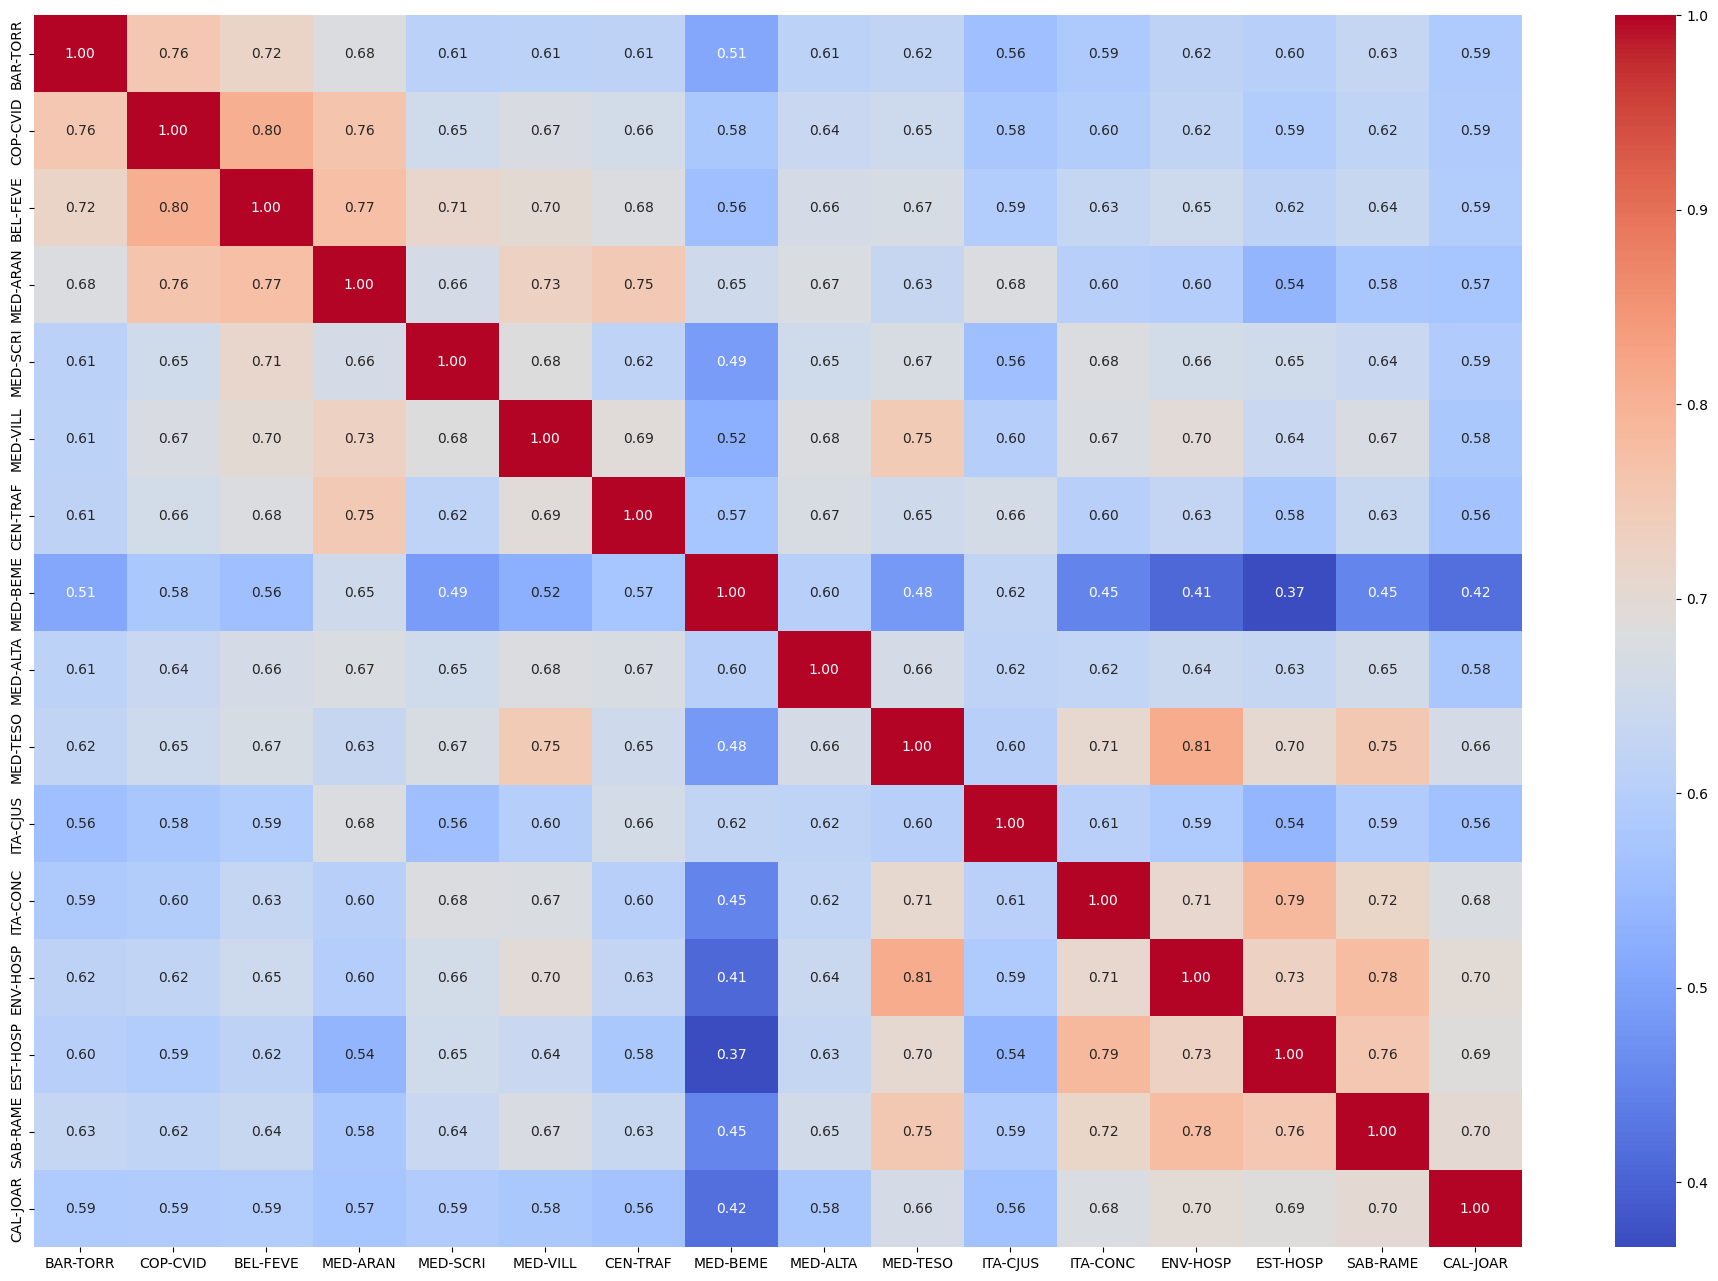

In [15]:
# Correlation matrix
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(24, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [16]:
# Multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.select_dtypes(include=[np.number]).dropna()
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

     feature        VIF
0   BAR-TORR   8.540799
1   COP-CVID  15.040052
2   BEL-FEVE  17.232041
3   MED-ARAN  21.211761
4   MED-SCRI  12.366501
5   MED-VILL  14.114393
6   CEN-TRAF  16.351036
7   MED-BEME   8.585623
8   MED-ALTA  14.521450
9   MED-TESO  17.115991
10  ITA-CJUS  11.740829
11  ITA-CONC  16.235473
12  ENV-HOSP  17.253882
13  EST-HOSP  16.500042
14  SAB-RAME  15.174565
15  CAL-JOAR  11.250259
